In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from treehopper.hoppers import hopper, treehopper
import treehopper.explore as e
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from ipywidgets import interact
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

In [15]:
rgauss = np.random.normal(size=(1000,2))

In [16]:
h1 = hopper(rgauss)
h2 = hopper(rgauss)

In [17]:
h1.hop()

beginning traversal!


[838]

In [18]:
h2.hop(10)

beginning traversal!
3.43542811211343
3.3831678099722455
3.2483577749719097
2.668970071658597
2.3784071511210048
2.3475116994048877
1.96152461062257
1.8747435686886287
1.7820615098747892


[62, 884, 589, 195, 872, 534, 471, 715, 611, 256]

In [19]:
h1>h2

False

In [20]:
th = treehopper(rgauss)
th.hop(2)

heap starting
beginning traversal!
3.960480251856874
splitting
beginning traversal!
beginning traversal!


In [21]:
th.get_vdict()

{554: [0,
  1,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  161,
  162,
  163,
  164,

In [22]:
cells = th.get_vcells()

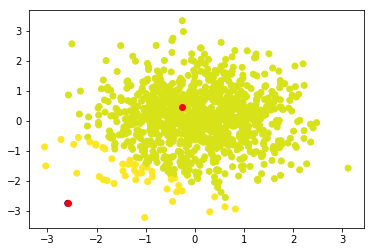

In [23]:
plt.scatter(rgauss[:,0],rgauss[:,1],c=cells)
plt.scatter(rgauss[th.path,0],rgauss[th.path,1],color='red')

In [24]:
th.get_vdict() 

{554: [0,
  1,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  161,
  162,
  163,
  164,

heap starting
radius inf
beginning traversal!
dict_keys([669])
[0]


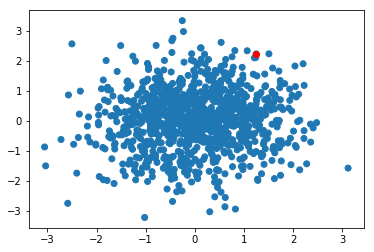

radius 6.287830838451162
4.24390571303472
dict_keys([669, 589])
[0 1]


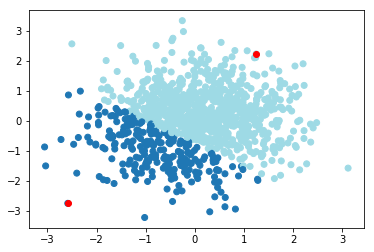

radius 4.24390571303472
3.7668789009943695
dict_keys([669, 589, 195])
[0 1 2]


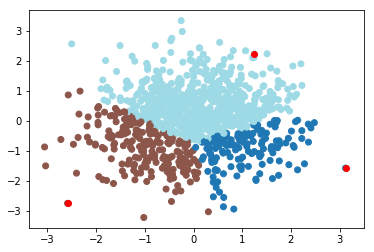

radius 3.7668789009943695
3.202358817681751
splitting
[2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 17, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 37, 39, 40, 43, 44, 45, 46, 47, 50, 52, 57, 59, 62, 65, 68, 69, 72, 74, 75, 76, 79, 80, 81, 83, 85, 87, 88, 91, 92, 93, 95, 97, 99, 103, 104, 106, 107, 111, 112, 113, 114, 115, 119, 121, 123, 124, 126, 127, 131, 133, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 156, 157, 161, 164, 167, 168, 169, 170, 173, 174, 175, 176, 178, 179, 184, 185, 186, 187, 188, 190, 191, 192, 193, 196, 200, 202, 203, 204, 206, 207, 209, 211, 213, 215, 216, 218, 222, 224, 225, 226, 227, 228, 231, 233, 235, 236, 239, 242, 244, 245, 248, 249, 250, 253, 255, 260, 261, 263, 265, 267, 268, 271, 272, 273, 274, 280, 281, 282, 283, 284, 285, 286, 288, 289, 290, 291, 292, 294, 296, 297, 298, 299, 300, 301, 302, 304, 305, 309, 311, 314, 315, 316, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 333, 336, 337, 338, 339, 341, 342, 345, 350, 351, 

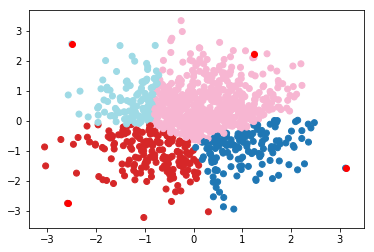

radius 3.202358817681751
2.3697870308563878
dict_keys([669, 884, 195, 589, 743])
[0 1 2 3 4]


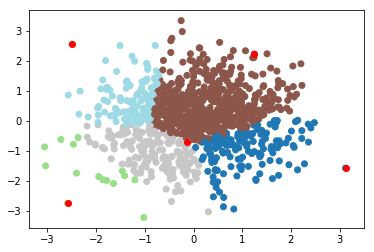

radius 3.16468593040226
2.08446792461735
dict_keys([195, 884, 589, 743, 669, 706])
[0 1 2 3 4 5]


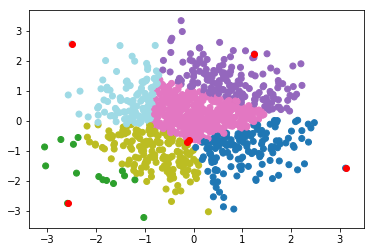

radius 3.1550134678373865
2.2014648109567543
dict_keys([884, 195, 332, 589, 743, 669, 706])
[0 1 2 3 4 5 6]


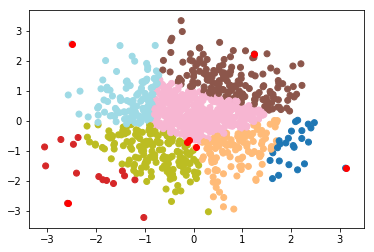

radius 3.120314300331299
1.778777296176591
dict_keys([589, 743, 195, 332, 669, 706, 884, 595])
[0 1 2 3 4 5 6 7]


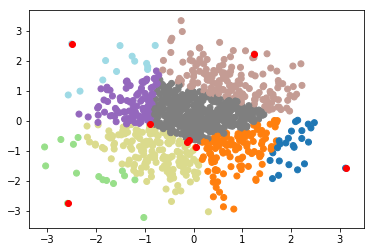

radius 2.3697870308563878
2.2063856185907222
dict_keys([589, 743, 160, 195, 332, 669, 706, 884, 595])
[0 1 2 3 4 5 6 7 8]


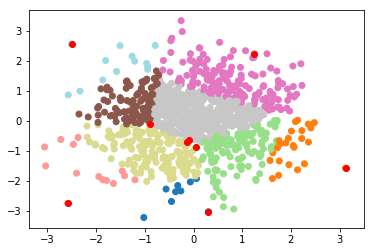

radius 2.2063856185907222
1.5896794108516559
splitting
[42, 198, 397, 441, 469, 518, 589, 827]
beginning traversal!
dict_keys([589])
[0, 6, 20, 24, 34, 38, 41, 48, 51, 56, 67, 70, 71, 73, 78, 82, 86, 110, 116, 118, 151, 162, 166, 177, 183, 194, 197, 205, 217, 219, 221, 223, 238, 243, 247, 251, 254, 259, 277, 278, 312, 313, 335, 349, 356, 357, 381, 396, 401, 402, 421, 422, 431, 433, 434, 440, 443, 446, 460, 481, 489, 496, 502, 503, 505, 507, 514, 517, 519, 521, 535, 557, 561, 567, 590, 594, 602, 604, 610, 628, 629, 630, 638, 649, 650, 656, 657, 667, 673, 680, 692, 696, 698, 717, 732, 734, 740, 743, 777, 783, 788, 791, 794, 796, 808, 814, 829, 844, 848, 851, 853, 890, 895, 903, 923, 928, 930, 932, 942, 948, 955, 962, 965, 968, 972, 977, 978, 983, 990, 994]
beginning traversal!
dict_keys([743])
[4, 120, 160, 171, 208, 307, 352, 576, 582]
beginning traversal!
dict_keys([160])
[10, 18, 33, 140, 153, 155, 159, 230, 232, 264, 287, 293, 330, 344, 386, 405, 426, 448, 450, 456, 488, 540, 544, 55

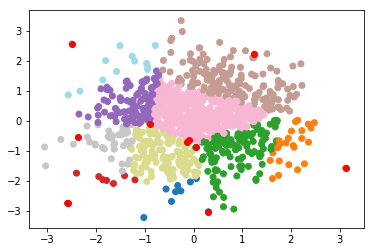

radius 2.2014648109567543
1.9001704490132714
dict_keys([669, 706, 884, 595, 195, 332, 534, 589, 743, 160, 707])
[ 0  1  2  3  4  5  6  7  8  9 10]


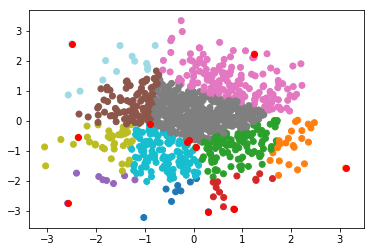

radius 2.08446792461735
2.0378922812972533
dict_keys([669, 706, 97, 884, 595, 195, 332, 534, 589, 743, 160, 707])
[ 0  1  2  3  4  5  6  7  8  9 10 11]


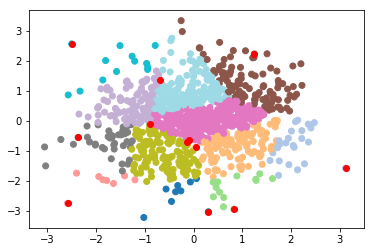

radius 2.0378922812972533
1.8688854976512093
splitting
[8, 13, 23, 46, 68, 81, 91, 104, 152, 157, 174, 175, 227, 244, 267, 272, 280, 283, 294, 315, 316, 350, 395, 399, 425, 430, 452, 463, 470, 471, 474, 533, 552, 591, 607, 669, 693, 700, 716, 750, 767, 823, 837, 841, 872, 893, 899, 902, 917, 922, 926, 929, 982, 988, 996]
beginning traversal!
dict_keys([669])
[2, 5, 12, 16, 21, 22, 25, 28, 31, 32, 37, 45, 52, 57, 62, 75, 87, 92, 93, 99, 103, 107, 115, 121, 131, 133, 139, 147, 150, 167, 168, 184, 187, 191, 192, 203, 206, 215, 216, 224, 231, 233, 235, 239, 242, 255, 260, 261, 263, 265, 271, 273, 274, 281, 282, 285, 286, 289, 292, 296, 298, 305, 309, 318, 320, 321, 322, 323, 325, 329, 338, 339, 341, 342, 351, 359, 360, 364, 365, 367, 369, 374, 375, 379, 382, 383, 387, 388, 390, 391, 400, 407, 408, 410, 412, 413, 415, 416, 418, 420, 424, 429, 435, 439, 442, 445, 467, 468, 473, 479, 485, 487, 490, 492, 494, 498, 506, 516, 520, 532, 536, 537, 542, 549, 551, 566, 572, 592, 603, 606, 616, 623, 

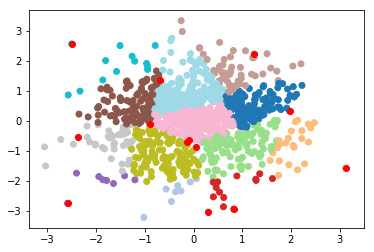

radius 1.9001704490132714
1.478667948040694
splitting
[60, 195, 569, 774, 807]
beginning traversal!
dict_keys([195])
[19, 58, 61, 63, 84, 90, 96, 105, 125, 130, 132, 154, 181, 189, 258, 270, 276, 332, 340, 358, 380, 417, 423, 476, 497, 527, 555, 558, 574, 579, 621, 632, 633, 634, 637, 648, 652, 653, 664, 665, 671, 672, 699, 702, 712, 726, 729, 747, 753, 761, 763, 798, 809, 819, 824, 825, 835, 876, 891, 906, 913, 918, 934, 946, 950, 958, 961, 963, 987]
beginning traversal!
dict_keys([332])
[172, 252, 334, 392, 534, 556, 580, 640, 651, 859, 910, 916, 933]
beginning traversal!
dict_keys([534])
[35, 49, 89, 98, 108, 163, 180, 201, 212, 214, 220, 234, 237, 241, 256, 262, 279, 303, 308, 317, 343, 347, 348, 362, 376, 414, 437, 465, 500, 559, 565, 600, 605, 612, 636, 643, 660, 685, 728, 742, 756, 766, 787, 821, 828, 834, 863, 881, 885, 898, 912, 924, 953, 966, 974, 998]
beginning traversal!
dict_keys([559])
dict_keys([669, 884, 595, 707, 589, 743, 559, 106, 706, 97, 195, 332, 534, 160])
[ 0  1

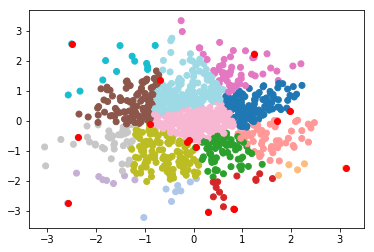

radius 1.8688854976512093
1.3833944904731894
dict_keys([884, 595, 589, 707, 97, 743, 669, 471, 106, 706, 160, 195, 332, 534, 559])
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


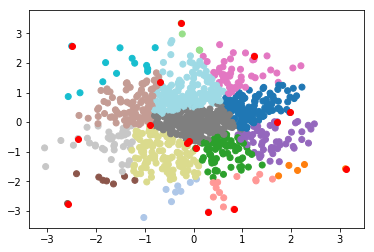

radius 1.778777296176591
1.706429265075569
dict_keys([884, 595, 618, 743, 589, 97, 332, 707, 106, 706, 160, 195, 559, 534, 669, 471])
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


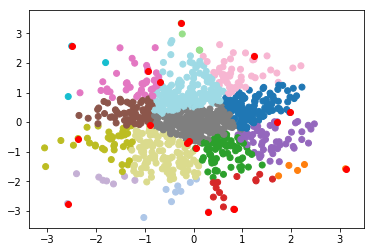

radius 1.706429265075569
1.0724711015531434
splitting
[723, 884]
beginning traversal!
dict_keys([884])
[1, 7, 36, 55, 66, 77, 100, 101, 122, 128, 129, 134, 149, 210, 240, 246, 266, 269, 275, 310, 331, 346, 372, 411, 428, 432, 451, 454, 493, 504, 512, 528, 573, 581, 595, 615, 617, 626, 654, 662, 668, 670, 686, 688, 703, 720, 733, 736, 752, 758, 772, 776, 782, 789, 790, 795, 799, 847, 862, 874, 889, 892, 904, 931, 940, 992]
beginning traversal!
dict_keys([595])
[15, 64, 94, 117, 158, 182, 199, 229, 257, 295, 306, 355, 373, 453, 509, 525, 526, 529, 546, 611, 618, 627, 684, 690, 691, 721, 759, 784, 801, 812, 843, 870, 915, 989]
beginning traversal!
dict_keys([618])
[53, 54, 102, 109, 165, 419, 444, 449, 482, 545, 588, 608, 609, 715, 845, 860]
beginning traversal!
dict_keys([482])
dict_keys([589, 743, 707, 97, 332, 669, 471, 106, 706, 160, 195, 559, 534, 884, 595, 618, 482])
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


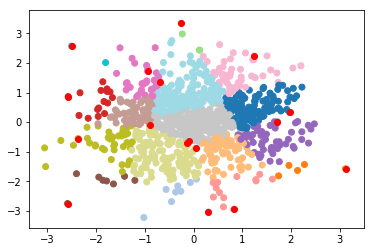

radius 1.5896794108516559
1.0235497678173522
dict_keys([743, 332, 707, 97, 195, 669, 471, 106, 706, 160, 482, 559, 534, 884, 595, 618, 589, 198])
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


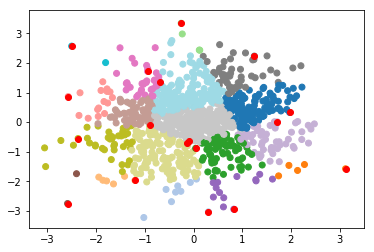

radius 1.5617944601730975
1.1278267795468744
dict_keys([332, 97, 707, 706, 195, 669, 471, 106, 743, 197, 160, 482, 559, 534, 884, 595, 618, 589, 198])
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


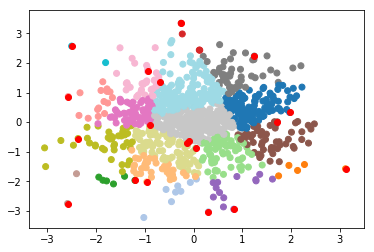

radius 1.478667948040694
1.0473923863060632
dict_keys([707, 97, 106, 706, 195, 669, 471, 595, 743, 197, 160, 482, 559, 534, 884, 589, 198, 618, 332, 154])
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


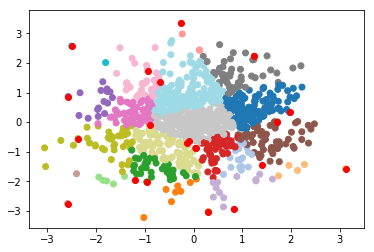

In [62]:
th = treehopper(rgauss, splits=4)
for i in range(20):
    th.hop()
    cells = deepcopy([str(x) for x in th.get_vcells()])
    le = LabelEncoder()
    le.fit(cells)
    cells = le.transform(cells)
    
    #print(cells)
    print(np.unique(cells))
    plt.scatter(rgauss[:,0],rgauss[:,1],c=cells, cmap='tab20')
    plt.scatter(rgauss[th.path,0],rgauss[th.path,1],color='red')
    plt.show()

In [80]:
@interact
def grow(N=(0,100,1)):
    plt.scatter(rgauss[:,0],rgauss[:,1])
    plt.scatter(rgauss[th.path[:N],0],rgauss[th.path[:N],1])
    plt.show()

interactive(children=(IntSlider(value=50, description='N'), Output()), _dom_classes=('widget-interact',))

In [19]:


h = hopper(rgauss)
h.hop(10)
h.hop(20)

[autoreload of treehopper.hoppers failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/usr/local/lib/python3.7/site-packages/IPytho

beginning traversal!


[932,
 525,
 2,
 122,
 476,
 21,
 14,
 930,
 111,
 664,
 331,
 132,
 971,
 68,
 456,
 177,
 810,
 154,
 911,
 468,
 310,
 583,
 471,
 703,
 294,
 856,
 547,
 879,
 807,
 425]

In [11]:
[len(x) for x in h.vdict.values()]

[19,
 0,
 1,
 16,
 102,
 2,
 0,
 1,
 4,
 21,
 27,
 89,
 19,
 2,
 24,
 94,
 119,
 16,
 0,
 9,
 9,
 8,
 37,
 26,
 65,
 6,
 58,
 46,
 115,
 35]

In [14]:
smaller.obs['wt']

979     20
797      1
742      2
635     17
865    103
738      3
852      1
581      2
401      5
442     22
444     28
174     90
360     20
14       3
891     25
232     95
220    120
70      17
487      1
53      10
183     10
983      9
606     38
961     27
933     66
515      7
255     59
543     47
62     116
9       36
Name: wt, dtype: int64

Trying to set attribute `.obs` of view, making a copy.


Counter({220: 120, 62: 116, 865: 103, 232: 95, 174: 90, 933: 66, 255: 59, 543: 47, 606: 38, 9: 36, 444: 28, 961: 27, 891: 25, 442: 22, 360: 20, 979: 20, 70: 17, 635: 17, 183: 10, 53: 10, 983: 9, 515: 7, 401: 5, 14: 3, 738: 3, 581: 2, 742: 2, 487: 1, 797: 1, 852: 1})


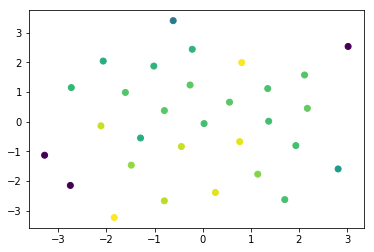

In [13]:
rgauss = sc.AnnData(rgauss)

smaller = e.compress(rgauss, h)
plt.scatter(smaller.X[:,0],smaller.X[:,1], c=h.rs)
plt.show()

In [16]:
smaller.obs['wt']

269    142
486      1
347      4
633      3
373      1
118      4
490      2
35      27
557     92
870      7
268      6
367     28
595    143
83      28
740      2
893     33
617     41
589     34
875      7
363      5
836    101
130      3
984    139
474      2
588     27
519      6
685     23
265     10
293      2
896     77
Name: wt, dtype: int64

In [11]:
sc.pp.neighbors(smaller)

/usr/local/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/usr/local/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/usr/local/lib/python3.7/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation 

In [14]:
sc.tl.louvain(smaller)

In [22]:
c1=e.filter(smaller, 'louvain',['1'])

In [26]:
expanded = e.expand(c1, rgauss)

[98, 30, 680, 495, 759, 933, 463, 764, 68, 744]
[887, 132, 132, 68, 531, 155, 132, 236, 784, 764, 236, 332, 132, 220, 764, 236, 556, 531, 132, 67, 132, 784, 495, 764, 764, 220, 236, 531, 132, 132, 30, 236, 988, 67, 796, 495, 495, 887, 236, 386, 386, 132, 887, 744, 332, 495, 495, 220, 531, 764, 132, 764, 67, 796, 949, 386, 68, 887, 236, 887, 132, 531, 784, 30, 448, 495, 386, 67, 68, 764, 531, 784, 132, 67, 386, 386, 236, 386, 796, 236, 529, 236, 796, 132, 132, 764, 529, 386, 764, 556, 764, 386, 386, 796, 132, 495, 764, 236, 98, 236, 386, 495, 531, 132, 132, 236, 236, 680, 386, 236, 132, 796, 638, 132, 764, 531, 764, 463, 764, 386, 132, 887, 495, 132, 448, 764, 680, 386, 887, 236, 887, 495, 132, 132, 332, 236, 448, 495, 887, 67, 140, 764, 132, 132, 495, 796, 784, 680, 236, 531, 386, 236, 495, 764, 386, 155, 887, 933, 933, 796, 68, 332, 132, 386, 531, 67, 495, 887, 796, 495, 236, 236, 531, 289, 764, 68, 796, 332, 132, 796, 933, 386, 796, 764, 132, 949, 668, 796, 236, 495, 495, 236, 386, 2

In [19]:
list(smaller.obs['louvain'])

['0',
 '2',
 '2',
 '1',
 '0',
 '1',
 '2',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '2',
 '2',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2']

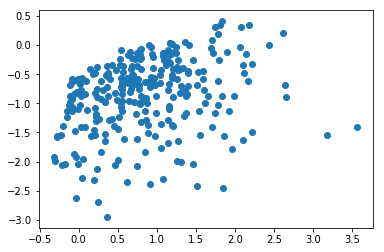

In [27]:
plt.scatter(expanded.X[:,0], expanded.X[:,1])

In [7]:
np.where([x in [1,2] for x in [1,2,3,4,5]])[0]

array([0, 1])

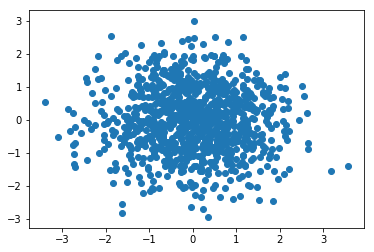

In [8]:
plt.scatter(rgauss.X[:,0],rgauss.X[:,1])